In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.datasets import make_moons, make_classification

In [28]:
data, labels = make_moons(n_samples=300, shuffle=True)
linear_data, linear_labels = make_moons(n_samples=300, shuffle=True)
linear_data[linear_labels == 0, 1] = linear_data[linear_labels == 0, 1] + .7 
noisey_data, noisey_labels = make_moons(n_samples=300, shuffle=True, noise=0.15)

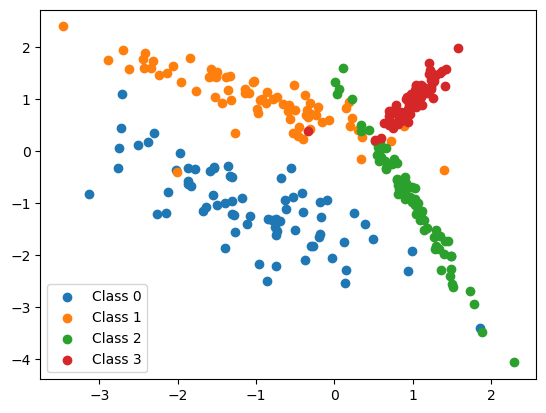

NameError: name 'linear_data' is not defined

In [6]:
def plot_scatter(coordinates, labels):
    # Ensure that coordinates and labels are numpy arrays
    coordinates = np.array(coordinates)
    labels = np.array(labels)

    # Check if the input arrays have compatible shapes
    if coordinates.shape[0] != labels.shape[0]:
        raise ValueError("The number of coordinates must match the number of labels")

    # Unique classes in the labels
    classes = np.unique(labels)

    # Plot each class with a different marker
    for cls in classes:
        idx = np.where(labels == cls)
        plt.scatter(coordinates[idx, 0], coordinates[idx, 1], label=f'Class {cls}')

    # Add legend to the plot
    plt.legend()

    # Show the plot
    plt.show()

plot_scatter(data, labels)
plot_scatter(linear_data, linear_labels)
plot_scatter(noisey_data, noisey_labels)

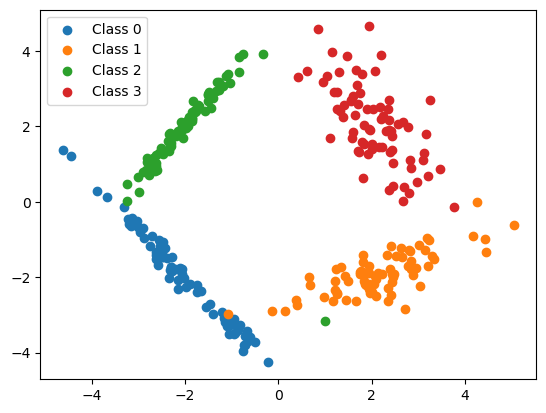

In [8]:
data, labels = make_classification(n_samples=300,
                                   n_features=2,
                                   n_classes=4,
                                   n_clusters_per_class=1,
                                   n_informative=2,
                                   n_redundant=0,
                                   n_repeated=0,
                                   class_sep=2)
plot_scatter(data, labels)

In [9]:
normal_data = (data - np.mean(data, axis=0)) / np.std(data)
# normal_linear_data = (linear_data - np.mean(linear_data, axis=0)) / np.std(linear_data)
# normal_noisey_data = (noisey_data - np.mean(noisey_data, axis=0)) / np.std(noisey_data)

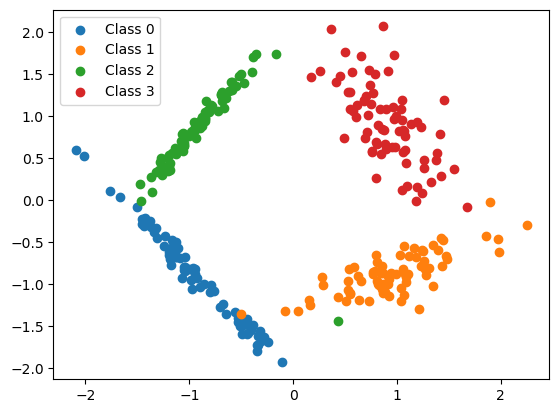

In [11]:
plot_scatter(normal_data, labels)

In [13]:
# split test set into valid and test set

from sklearn.model_selection import train_test_split

np_test_data, np_train_data, np_test_label, np_train_label = train_test_split(normal_data, labels, test_size=0.8)
np_test_data, np_valid_data, np_test_label, np_valid_label = train_test_split(np_test_data, np_test_label, test_size=0.5)

len(np_train_data), len(np_test_label)

(240, 30)

In [50]:
# let us create cnn matrixes... because...

'''np_valid_data[0], np.outer(np_valid_data[0], np_valid_data[0])

np_matrix_train = np.outer(np_train_data, np_train_data)
np_matrix_valid = np.outer(np_valid_data, np_valid_data)
np_matrix_test = np.outer(np_test_data, np_test_data)'''
    

'np_valid_data[0], np.outer(np_valid_data[0], np_valid_data[0])\n\nnp_matrix_train = np.outer(np_train_data, np_train_data)\nnp_matrix_valid = np.outer(np_valid_data, np_valid_data)\nnp_matrix_test = np.outer(np_test_data, np_test_data)'

In [14]:
# let us convert them all to tensors
import torch

tensor_train_label = torch.tensor(np_train_label, requires_grad=False).to(torch.long)
tensor_test_label = torch.tensor(np_test_label, requires_grad=False).to(torch.long)
tensor_valid_label = torch.tensor(np_valid_label, requires_grad=False).to(torch.long)

tensor_train_data = torch.tensor(np_train_data, requires_grad=False)
tensor_test_data = torch.tensor(np_test_data, requires_grad=False)
tensor_valid_data = torch.tensor(np_valid_data, requires_grad=False)

'''tensor_train_matrix= torch.tensor(np_matrix_train, requires_grad=False)
tensor_test_matrix = torch.tensor(np_matrix_test, requires_grad=False)
tensor_valid_matrix = torch.tensor(np_matrix_valid, requires_grad=False)'''


'tensor_train_matrix= torch.tensor(np_matrix_train, requires_grad=False)\ntensor_test_matrix = torch.tensor(np_matrix_test, requires_grad=False)\ntensor_valid_matrix = torch.tensor(np_matrix_valid, requires_grad=False)'

In [15]:
np_train_label

array([2, 3, 0, 0, 3, 1, 2, 0, 2, 3, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2,
       1, 0, 3, 2, 0, 1, 0, 0, 2, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 0,
       0, 2, 3, 3, 2, 2, 2, 2, 0, 3, 3, 0, 0, 0, 1, 1, 0, 3, 1, 3, 3, 2,
       0, 0, 1, 3, 0, 1, 2, 1, 3, 3, 1, 0, 2, 2, 2, 0, 3, 1, 1, 2, 1, 2,
       1, 3, 3, 1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 3, 0, 0, 3, 2, 3, 3, 2, 0,
       2, 2, 3, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 3, 1, 3, 0, 0, 2, 2, 0, 2,
       2, 3, 1, 3, 3, 3, 0, 1, 1, 1, 2, 2, 3, 1, 2, 3, 2, 0, 1, 1, 0, 1,
       3, 3, 0, 2, 2, 1, 0, 2, 1, 3, 0, 3, 3, 1, 1, 0, 1, 0, 0, 3, 0, 3,
       1, 2, 2, 3, 3, 3, 3, 0, 2, 0, 0, 0, 3, 2, 1, 0, 1, 1, 0, 2, 1, 0,
       2, 0, 0, 2, 1, 1, 0, 2, 3, 2, 1, 3, 0, 0, 3, 0, 3, 0, 1, 0, 2, 3,
       1, 1, 0, 2, 2, 3, 3, 2, 3, 3, 2, 0, 3, 3, 1, 0, 3, 0, 1, 1])

In [16]:
# one hot encoding for classification

import torch.nn.functional as F

num_classes = 4

tensor_train_label = F.one_hot(tensor_train_label, num_classes=num_classes)
tensor_test_label = F.one_hot(tensor_test_label, num_classes=num_classes)
tensor_valid_label = F.one_hot(tensor_valid_label, num_classes=num_classes)

In [47]:
# tensor_valid_label
# tensor_test_data

tensor([[-6.3721e-01, -5.7081e-02],
        [-6.9631e-01,  2.8996e-01],
        [-2.7321e-01, -6.5319e-01],
        [-3.3411e-01,  9.9816e-01],
        [-9.1229e-02, -8.0194e-01],
        [ 7.1226e-01, -1.0463e+00],
        [-1.1454e+00,  9.7249e-01],
        [ 8.6567e-02, -9.0543e-01],
        [-2.0140e+00,  1.1299e-01],
        [-1.1732e+00,  9.6276e-01],
        [ 2.0482e+00, -4.5104e-04],
        [-1.1531e-01, -7.8505e-01],
        [ 6.4547e-01,  2.8850e-02],
        [-1.3348e+00,  8.9227e-01],
        [ 6.2405e-01, -1.0444e+00],
        [ 2.0040e+00, -1.4064e-01],
        [ 1.1531e-01,  7.8505e-01],
        [-6.5344e-01,  1.0456e+00],
        [-1.3609e+00,  8.7855e-01],
        [ 4.2018e-02,  8.3417e-01],
        [ 2.0323e+00, -5.7081e-02],
        [-4.6141e-01, -4.2783e-01],
        [-1.3866e+00,  8.6430e-01],
        [-1.3085e+00,  9.0543e-01],
        [ 5.8710e-01,  1.9528e-01],
        [ 1.8565e+00, -4.2783e-01],
        [ 2.0899e+00,  2.6059e-01],
        [ 2.0849e+00,  2.019

In [17]:
# lets save, 

torch.save({'train_label': tensor_train_label, 'test_label':tensor_test_label, 'valid_label': tensor_valid_label,
            'train_data': tensor_train_data, 'test_data': tensor_test_data, 'valid_data': tensor_valid_data,
           'num_classes': num_classes}, 'cluster_dict.pt')

# torch.save({'train_label': tensor_train_label, 'test_label':tensor_test_label, 'valid_label': tensor_valid_label, 'train_data': tensor_train_matrix, 'test_data':tensor_test_matrix, 'valid_data': tensor_valid_matrix }, 'iris_matrix_tensor_dict.pt')

In [20]:
7

7

In [ ]:
# vestiges

